# Import Library

Mengimpor library yang diperlukan.

In [5]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Loading

Load dataset yang akan digunakan.

In [6]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/005930.KS.csv')

Melihat isi dataset dengan perintah df

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,39400.0,39400.0,38550.0,38750.0,33061.847656,7847664
1,2019-01-03,38300.0,38550.0,37450.0,37600.0,32080.662109,12471493
2,2019-01-04,37450.0,37600.0,36850.0,37450.0,31952.667969,14108958
3,2019-01-07,38000.0,38900.0,37800.0,38750.0,33061.847656,12748997
4,2019-01-08,38000.0,39200.0,37950.0,38100.0,32507.259766,12756554
...,...,...,...,...,...,...,...
1500,2025-02-12,55100.0,55900.0,54500.0,55800.0,55800.000000,26428596
1501,2025-02-13,56100.0,56400.0,55600.0,55800.0,55800.000000,22448377
1502,2025-02-14,56000.0,57300.0,56000.0,56000.0,56000.000000,23979779
1503,2025-02-17,56100.0,56500.0,55700.0,56000.0,56000.000000,11916027


Dari tabel diatas terdapat 1505 baris dan 7 kolom pada dataset.

# Exploratory Data Analysis

## Deskripsi Variabel

Berikut merupakan arti dari variabel yang digunakan dalam dataset

| Kolom       | Deskripsi                                                                         |
| ----------- | --------------------------------------------------------------------------------- |
| `Date`      | Tanggal pencatatan data saham                                                     |
| `Open`      | Harga pembukaan saham pada hari tersebut                                          |
| `High`      | Harga tertinggi yang dicapai pada hari tersebut                                   |
| `Low`       | Harga terendah yang dicapai pada hari tersebut                                    |
| `Close`     | Harga penutupan saham pada hari tersebut                                          |
| `Adj Close` | Harga penutupan yang telah disesuaikan (misalnya, untuk stock split atau dividen) |
| `Volume`    | Jumlah saham yang diperdagangkan pada hari tersebut                               |


Selanjutnya adalah mengecek informasi pada dataset dengan fungsi info()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1505 entries, 0 to 1504
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1505 non-null   object 
 1   Open       1505 non-null   float64
 2   High       1505 non-null   float64
 3   Low        1505 non-null   float64
 4   Close      1505 non-null   float64
 5   Adj Close  1505 non-null   float64
 6   Volume     1505 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 82.4+ KB


Dari hasil informasi terlihat bahwa :
- Terdapat 1 kolom dengan tipe object, yaitu : Date.
  - Kolom ini harusnya bertipe datetime karena mempresentasikan tanggal, bukan tipe data object yang digunakan untuk teks (string)
- Terdapat 5 kolom dengan tipe float64, yaitu : Open, High, Low, Close, dan Adj Close.
  - Tipe data sudah sesuai dengan isi dari kolomya.
- Terdapat 1 kolom dengan tipe int64, yaitu : volume.
  - Tipe data sudah sesuai dengan isi dari kolomya.

Selanjutnya, merubah tipe data object ke tipe data datetime pada kolom Date.


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.dtypes

,0
Date,datetime64[ns]
Open,float64
High,float64
Low,float64
Close,float64
Adj Close,float64
Volume,int64


Dari hasil yang ditampilkan diatas, terlihat tipe data sudah berubah sebagai mana mestinya.

In [ ]:
df = df.rename(columns={'Adj Close': 'Adj_Close'})

Selanjutnya kita akan mengecek deskripsi statistik dengan fugsi describe()

In [ ]:
df.describe()

,Date,Open,High,Low,Close,Adj_Close,Volume
count,1505,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000,1.505000e+03
mean,2022-01-20 02:35:00.199335424,64154.617940,64734.019934,63548.704319,64108.903654,59933.013632,1.662527e+07
min,2019-01-02 00:00:00,37450.000000,37600.000000,36850.000000,37450.000000,31952.667969,0.000000e+00
25%,2020-07-10 00:00:00,54700.000000,55500.000000,54200.000000,54900.000000,50596.265625,1.129974e+07
50%,2022-01-18 00:00:00,63700.000000,63900.000000,62800.000000,63200.000000,60596.542969,1.479661e+07
75%,2023-07-28 00:00:00,73900.000000,74500.000000,73200.000000,73900.000000,70924.578125,2.000113e+07
max,2025-02-18 00:00:00,90300.000000,96800.000000,89500.000000,91000.000000,86718.812500,9.030618e+07
std,NaN,12269.830763,12321.091699,12176.813372,12227.346773,12894.680103,8.731552e+06


Fungsi describe() memberikan informasi statistik pada masing-masing kolom, antara lain:
- Count adalah jumlah sampel pada data.
- Mean adalah nilai rata-rata.
- Std adalah standar deviasi.
- Min yaitu nilai minimum setiap kolom.
- 25% adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.
- 50% adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
- 75% adalah kuartil ketiga.
- Max adalah nilai maksimum.

## Menangani Missing Value

Mengecek jumlah data yang kosong atau null pada dataset dengan fungsi isna().sum()

In [ ]:
df.isna().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj_Close,0
Volume,0


Dari hasil yang ditampilkan, data tidak ada yang bernilai kosong (null) pada setiap kolom dataset.

## Menangani Duplikasi Data

Mengecek jumlah data yang duplikat atau ganda dengan fungsi .duplicated().sum()

In [ ]:
print(f"Jumlah duplikasi data : {df.duplicated().sum()}")

Jumlah duplikasi data : 0


Dari hasil yang ditampilkan, data tidak ada yang bernilai duplikat atau ganda pada setiap kolom dataset.

## Menangani Outliers

Sekarang, mari kita visualisasikan dataset dengan boxplot untuk mendeteksi outliers pada fitur numerik.

<Axes: xlabel='Open'>

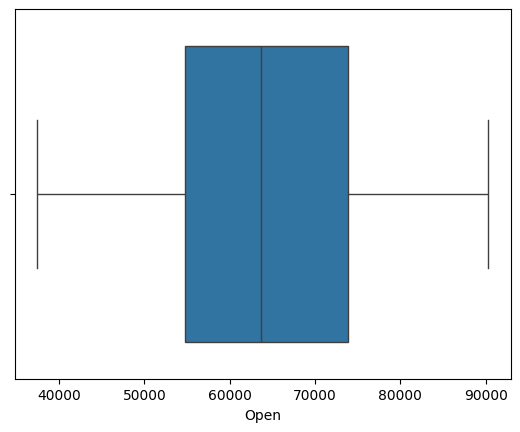

In [ ]:
sns.boxplot(x = df['Open'])

<Axes: xlabel='High'>

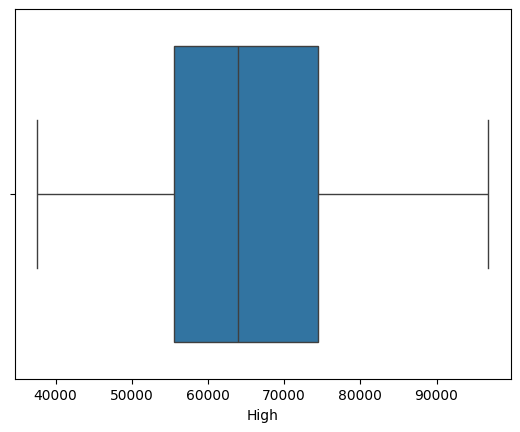

In [ ]:
sns.boxplot(x = df['High'])

<Axes: xlabel='Low'>

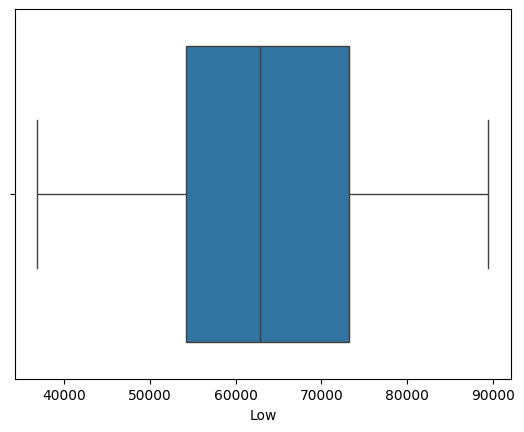

In [ ]:
sns.boxplot(x = df['Low'])

<Axes: xlabel='Close'>

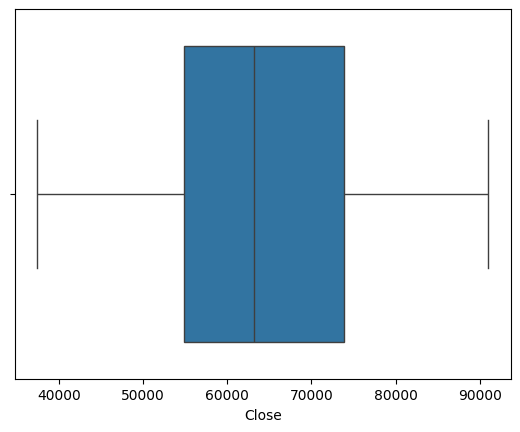

In [ ]:
sns.boxplot(x = df['Close'])

<Axes: xlabel='Adj_Close'>

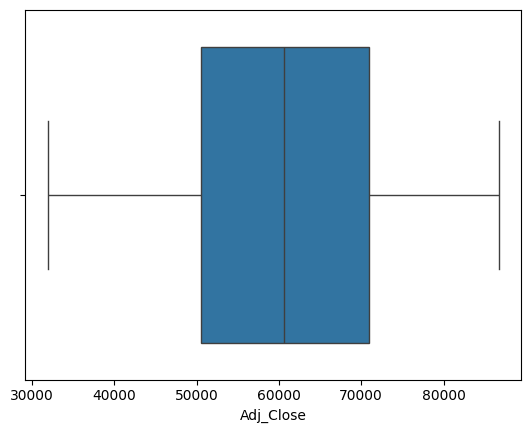

In [ ]:
sns.boxplot(x = df['Adj_Close'])

<Axes: xlabel='Volume'>

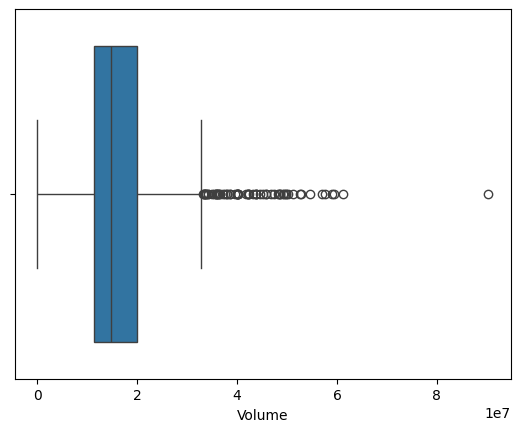

In [ ]:
sns.boxplot(x = df['Volume'])

Terlihat dari visualisasi boxplot diatas, fitur numerik dari kolom Volume memiliki outliers.

Selanjutnya adalah mengatasi outliers tersebut dengan metode IQR. Kita akan menggunakan metode IQR untuk mengidentifikasi outlier yang berada di luar Q1 dan Q3. Nilai apa pun yang berada di luar batas ini dianggap sebagai outlier.

In [ ]:
kolom = "Volume"

for i in range(5):
    Q1 = df[kolom].quantile(0.25)
    Q3 = df[kolom].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    filter_outliers = df[(df[kolom] < lower_bound) | (df[kolom] > upper_bound)]

    print(f"Iterasi ke-{i+1}:")
    print(f"Q1 = {Q1}, Q3 = {Q3}, IQR = {IQR}")
    print(f"Batas bawah = {lower_bound}, batas atas = {upper_bound}")
    print(f"Jumlah outlier: {filter_outliers.shape[0]}")
    print(filter_outliers)
    print("="*50)

    # Hapus outlier dari DataFrame
    df = df[(df[kolom] >= lower_bound) & (df[kolom] <= upper_bound)]


Iterasi ke-1:
Q1 = 11299738.0, Q3 = 20001134.0, IQR = 8701396.0
Batas bawah = -1752356.0, batas atas = 33053228.0
Jumlah outlier: 66
           Date     Open     High      Low    Close     Adj_Close    Volume
293  2020-03-11  54300.0  54400.0  52000.0  52100.0  45771.359375  45707281
295  2020-03-13  47450.0  51600.0  46850.0  49950.0  43882.519531  59462933
296  2020-03-16  50100.0  50900.0  48800.0  48900.0  42960.062500  33339821
297  2020-03-17  46900.0  49650.0  46700.0  47300.0  41554.421875  51218151
298  2020-03-18  47750.0  48350.0  45600.0  45600.0  40060.921875  40152623
...         ...      ...      ...      ...      ...           ...       ...
1444 2024-11-15  50300.0  54200.0  50300.0  53500.0  53137.675781  46774485
1445 2024-11-18  57000.0  57500.0  55900.0  56700.0  56316.003906  48095234
1450 2024-11-25  57400.0  57900.0  56700.0  57900.0  57507.878906  36237325
1463 2024-12-12  54000.0  56500.0  53900.0  55900.0  55521.421875  33476698
1492 2025-01-31  52200.0  53000

In [ ]:
df.shape

(1400, 7)

Pada kolom 'Volume', dilakukan analisis outlier menggunakan metode Interquartile Range (IQR). Nilai Q1 (kuartil pertama) adalah 11.299.738, yang berarti 25% data memiliki nilai lebih kecil dari angka ini. Sementara itu, Q3 (kuartil ketiga) adalah 20.001.134, artinya 75% data memiliki nilai lebih kecil dari angka tersebut. Selisih antara Q3 dan Q1 disebut IQR, yang dalam hal ini sebesar 8.701.396.

Berdasarkan metode IQR, batas bawah untuk mendeteksi outlier adalah Q1 - 1.5 × IQR, yang menghasilkan nilai -1.752.356. Karena volume tidak mungkin bernilai negatif, tidak ditemukan outlier pada sisi bawah. Sedangkan batas atas ditentukan dari Q3 + 1.5 × IQR, yaitu 33.053.228. Setiap nilai volume yang melebihi batas atas ini dianggap sebagai outlier atas.

Dari hasil perhitungan, ditemukan sebanyak 66 baris data yang memiliki nilai volume melebihi batas atas tersebut. Dengan demikian, dapat disimpulkan bahwa terdapat 66 outlier pada kolom 'Volume', yang semuanya merupakan outlier atas.


In [ ]:
df.shape

(1400, 7)

Dataset sekarang telah bersih dan memiliki 1439 sampel.

# Exploratory Data Analysis - Univariate Analysis

Selanjutnya, kita akan melakukan proses analisis data dengan teknik Univariate EDA.

Pertama, Anda bagi fitur pada dataset menjadi dua bagian, yaitu numerical features dan datetime features.

In [ ]:
numerical_features = ['Open', 'High', 'Low', 'Close', 'Adj_Close', 'Volume']
datetime_features = ['Date']

## Numerical Features

Selanjutnya, kita akan melakukan visualisasi distribusi dan boxplot pada fitur numerikal.

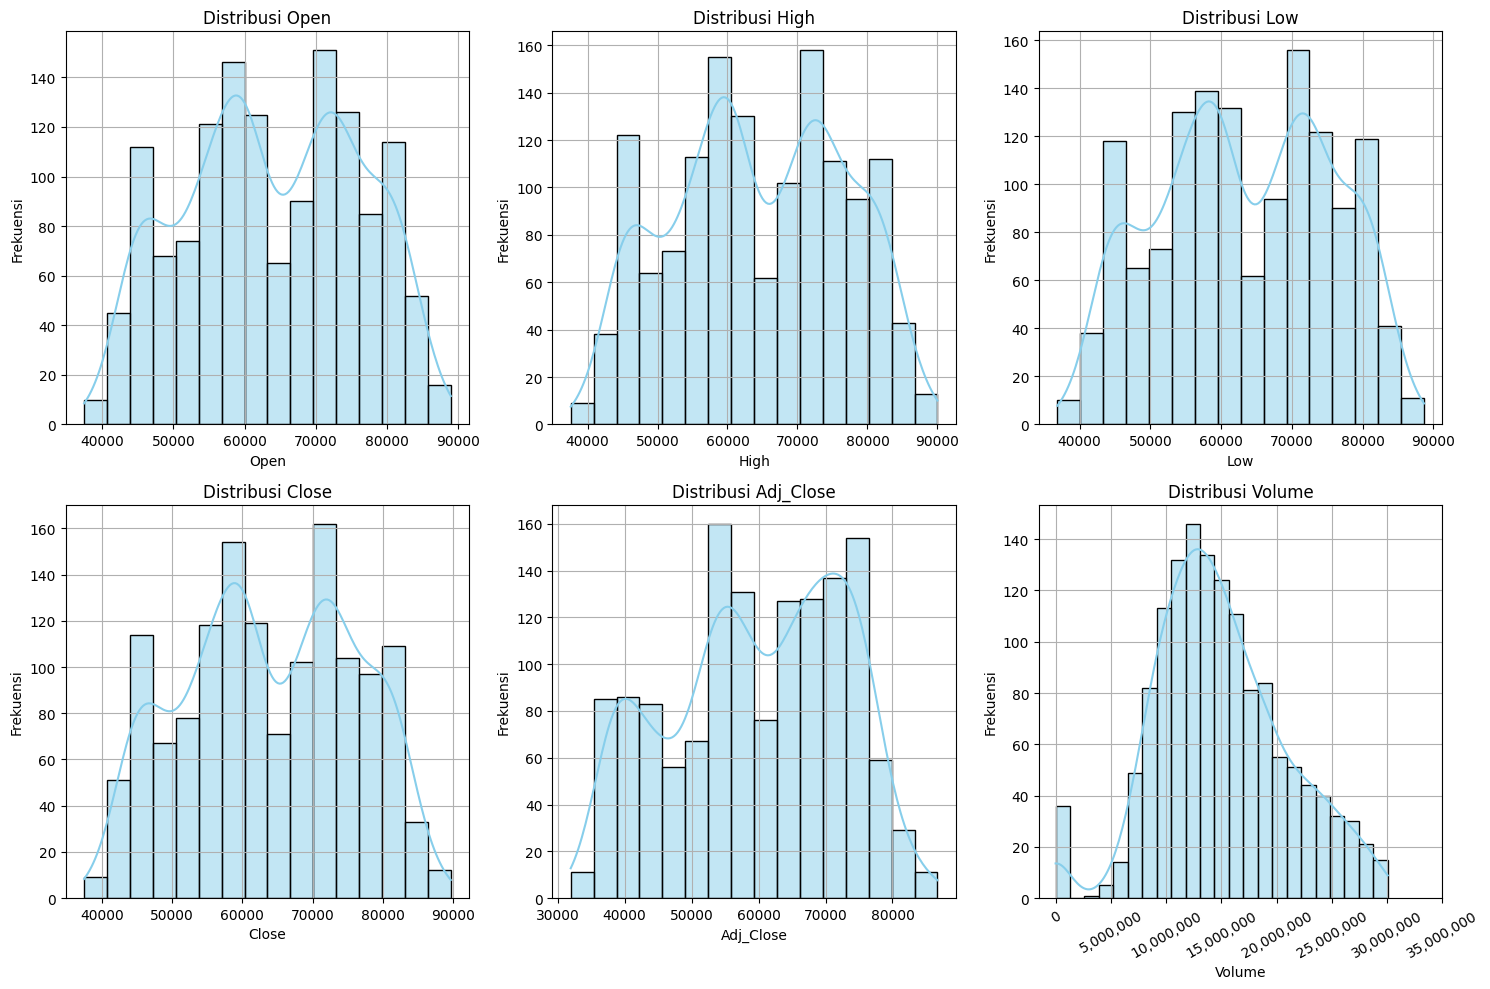

In [ ]:
num_features = len(numerical_features)

plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.grid(True)

    if col == 'Volume':
        xticks = plt.xticks()[0]
        xticks = [x for x in xticks if x >= 0]
        xtick_labels = [f"{int(x):,}" for x in xticks]
        plt.xticks(ticks=xticks, labels=xtick_labels, rotation=30)

plt.tight_layout()
plt.show()


Berdasarkan grafik distribusi data dari numerical_feature yang ditampilkan, dapat dilihat bahwa :
1. Rentang nilai dari setiap variabel (Open, High, Low, Close) memiliki rentang nilai yang serupa, yaitu 40.000 hingga 90.000. Namun pada Adj_Close berkisar 30.000 hingga 80.000, sedangkan Volume berkisar 0 sampai 35.000.000.

2. Pada Adj_Close menunjukkan bahwa harga penutupan yang disesuaikan lebih stabil atau tidak mencapai nilai ekstrem seperti Close (90.000).

2. Pada Volume tidak ada rentang nilai yang jelas, tetapi jika dianggap dalam skala yang berbeda (misalnya jutaan), distribusi mungkin sangat miring (right-skewed) karena volume perdagangan seringkali memiliki outlier tinggi.

## Datetime Features

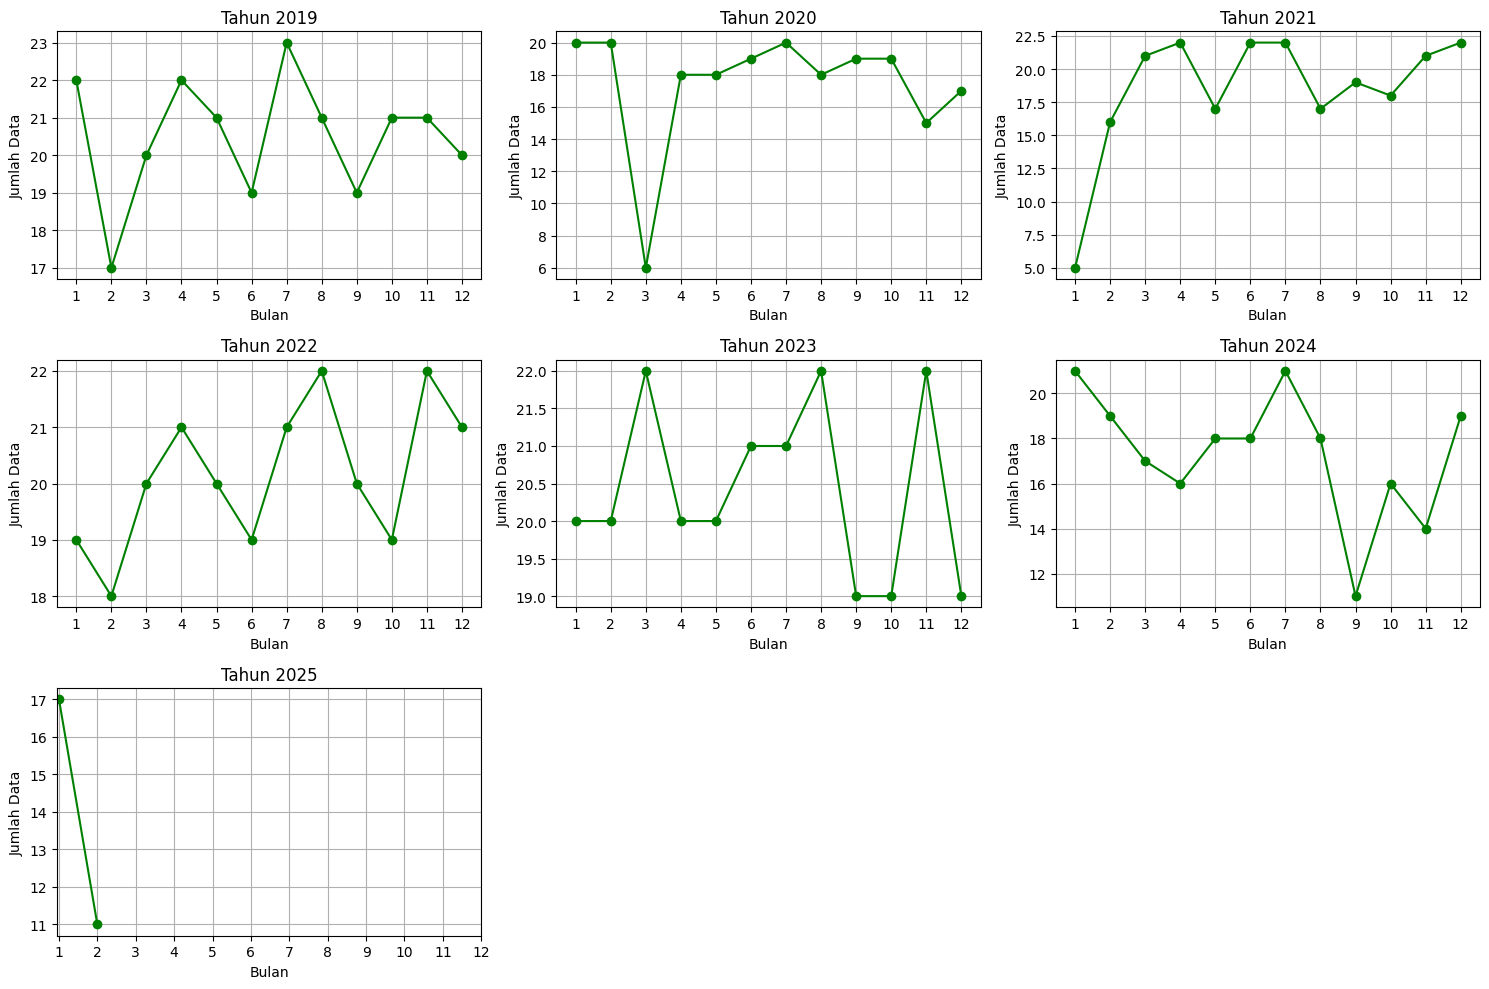

In [ ]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

monthly_counts = df.groupby(['Year', 'Month']).size().reset_index(name='Count')

unique_years = sorted(df['Year'].unique())

fig, axes = plt.subplots(3, 3, figsize=(15, 10))
axes = axes.flatten()

for i, year in enumerate(unique_years):
    data = monthly_counts[monthly_counts['Year'] == year]
    ax = axes[i]
    ax.plot(data['Month'], data['Count'], marker='o', linestyle='-', color='green')
    ax.set_title(f'Tahun {year}')
    ax.set_xlabel('Bulan')
    ax.set_ylabel('Jumlah Data')
    ax.set_xticks(range(1, 13))
    ax.grid(True)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Berdasarkan grafik dari jumlah data per tahun , dapat disimpulkan bahwa :
- 2019 terdapat 246 data
- 2020 terdapat 209 data
- 2021 terdapat 222 data
- 2022 terdapat 242 data
- 2023 terdapat 245 data
- 2024 terdapat 208 data
- 2025 terdapat 28 data

# Exploratory Data Analysis - Multivariate Analysis

## Mengamati hubungan antar fitur numerik dengan fungsi pairplot()

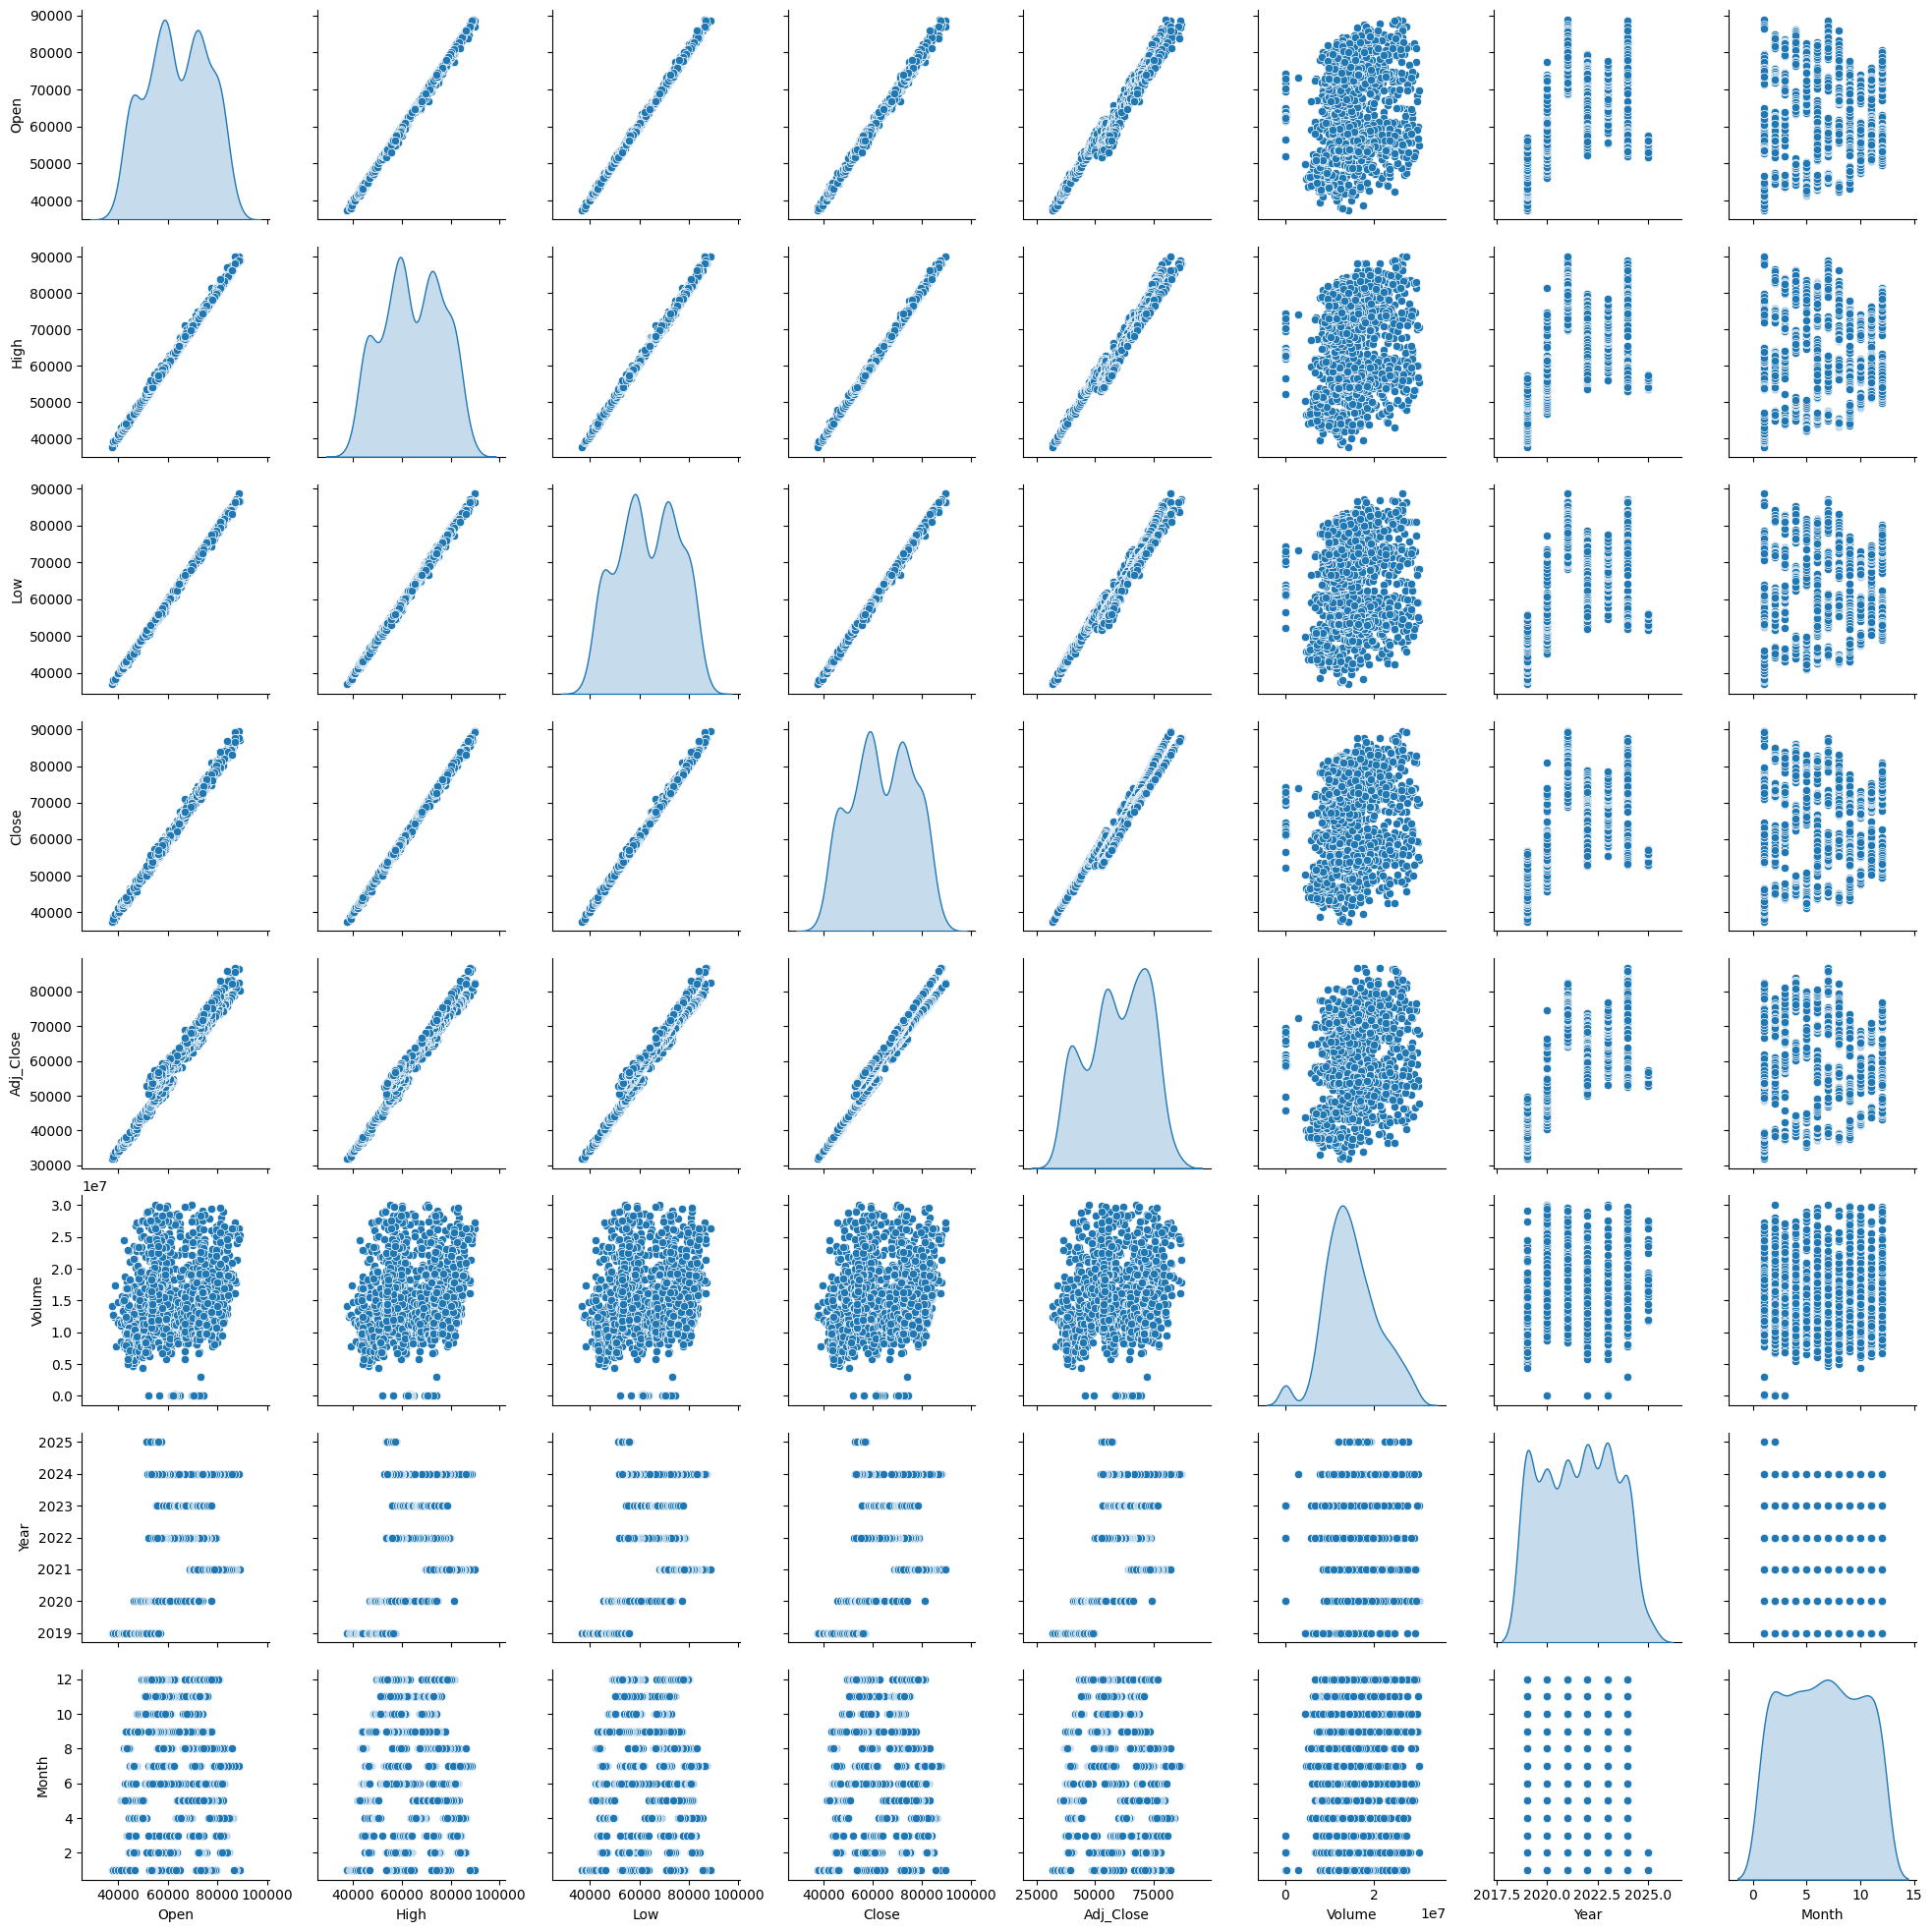

In [ ]:
sns.pairplot(df, diag_kind='kde')
plt.show()

## Melihat korelasi variabel numerik dengan menggunakan Heatmap

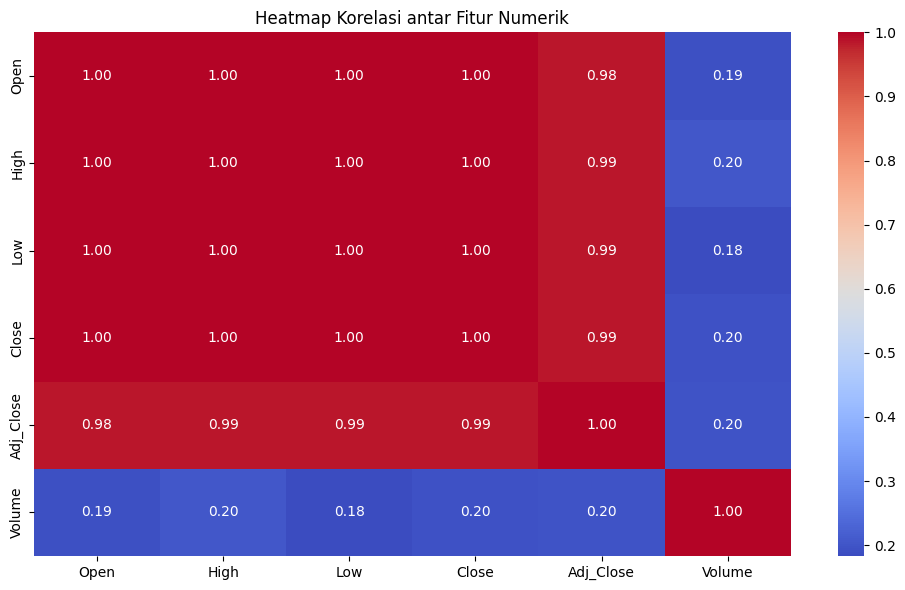

In [ ]:
corr_matrix = df[numerical_features].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi antar Fitur Numerik")
plt.tight_layout()
plt.show()

Berdasarkan gambar diatas, terlihat bahwa :
1. Fitur Open, High, Low, Close, Adj Close punya korelasi mendekati 1, artinya mereka mengandung informasi yang hampir sama.
2. Volume perdagangan tidak berkorelasi langsung dengan perubahan harga saham.

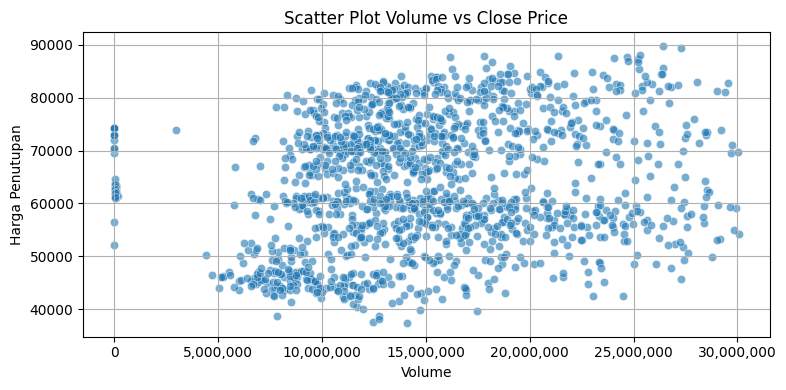

In [ ]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x='Volume', y='Close', data=df, alpha=0.6)
plt.title("Scatter Plot Volume vs Close Price")
plt.xlabel("Volume")
plt.ylabel("Harga Penutupan")
plt.grid(True)
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.tight_layout()
plt.show()

## visualisasi time series

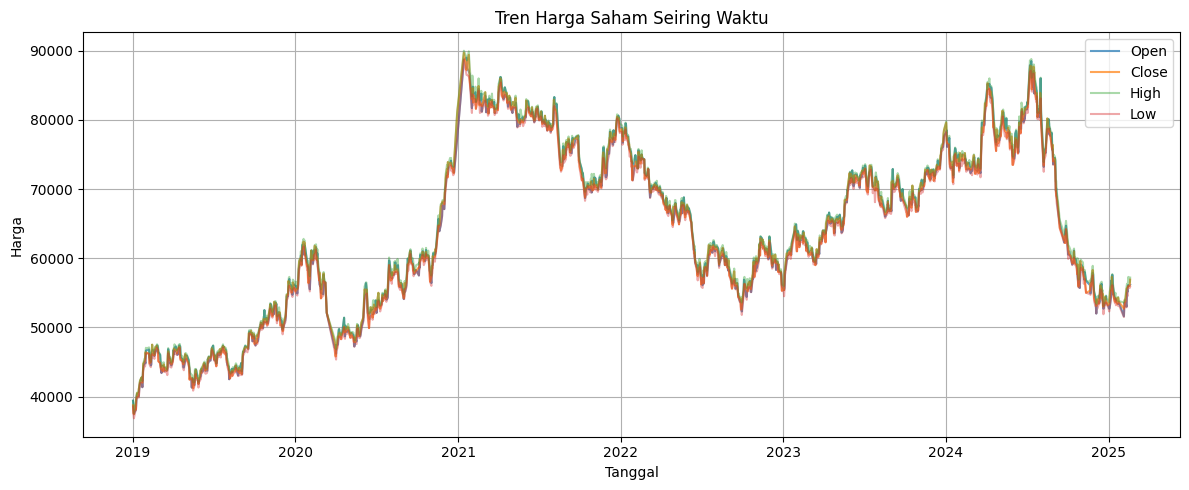

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(df['Date'], df['Open'], label='Open', alpha=0.7)
plt.plot(df['Date'], df['Close'], label='Close', alpha=0.7)
plt.plot(df['Date'], df['High'], label='High', alpha=0.4)
plt.plot(df['Date'], df['Low'], label='Low', alpha=0.4)
plt.legend()
plt.title("Tren Harga Saham Seiring Waktu")
plt.xlabel("Tanggal")
plt.ylabel("Harga")
plt.grid(True)
plt.tight_layout()
plt.show()

Dari tahun 2018 hingga awal 2021, terlihat tren kenaikan harga saham yang signifikan, terutama lonjakan tajam di akhir 2020 hingga awal 2021. Setelah mencapai puncak di awal 2021 (~90.000), harga mulai mengalami fluktuasi dan penurunan bertahap.

# Data Preparation

Pada tahap ini kita akan melakukan proses transformasi pada data sehingga menjadi bentuk yang cocok untuk proses pemodelan. Ada beberapa tahap persiapan data perlu dilakukan, yaitu :

1. Drop kolom yang tidak diperlukan.
2. Pembagian dataset dengan fungsi train_test_split dari library sklearn.

## Drop kolom yang tidak diperlukan

Pada tahap ini ada beberapa kolom pada dataset yang tidak perlu digunakan dalam pemrosesan data yakni Date, Year, dan Month. Kolom-kolom ini akan dihapus menggunakan fungsi drop()

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj_Close,Volume,Year,Month
0,2019-01-02,39400.0,39400.0,38550.0,38750.0,33061.847656,7847664,2019,1
1,2019-01-03,38300.0,38550.0,37450.0,37600.0,32080.662109,12471493,2019,1
2,2019-01-04,37450.0,37600.0,36850.0,37450.0,31952.667969,14108958,2019,1
3,2019-01-07,38000.0,38900.0,37800.0,38750.0,33061.847656,12748997,2019,1
4,2019-01-08,38000.0,39200.0,37950.0,38100.0,32507.259766,12756554,2019,1


In [ ]:
df = df.drop(columns = ['Date'])

Selnjutnya, kita akan mengecek informasi terbaru menggunakan fungsi info()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1400 entries, 0 to 1504
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1400 non-null   float64
 1   High       1400 non-null   float64
 2   Low        1400 non-null   float64
 3   Close      1400 non-null   float64
 4   Adj_Close  1400 non-null   float64
 5   Volume     1400 non-null   int64  
 6   Year       1400 non-null   int32  
 7   Month      1400 non-null   int32  
dtypes: float64(5), int32(2), int64(1)
memory usage: 87.5 KB


## Train-Test-Split

Selanjutnya kita membagi data menjadi 2, yaitu Data training sebesar 80% untuk melatih model Data testing sebesar 20% untuk menguji model

In [ ]:
x = df.drop(columns='Year', axis=1)
y = df['Year']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1400 entries, 0 to 1504
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1400 non-null   float64
 1   High       1400 non-null   float64
 2   Low        1400 non-null   float64
 3   Close      1400 non-null   float64
 4   Adj_Close  1400 non-null   float64
 5   Volume     1400 non-null   int64  
 6   Year       1400 non-null   int32  
 7   Month      1400 non-null   int32  
dtypes: float64(5), int32(2), int64(1)
memory usage: 87.5 KB


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

Langkah selanjutnya kita akan menampilkan ukuran data training dan testing kita yang telah kita bagi.

In [ ]:
print(f"Jumlah data x_train : {x_train.shape}")
print("Jumlah data x_test : ", x_test.shape)
print("Jumlah data y_train : ", y_train.shape)
print("Jumlah data y_test : ", y_test.shape)

Jumlah data x_train : (1120, 7)
Jumlah data x_test :  (280, 7)
Jumlah data y_train :  (1120,)
Jumlah data y_test :  (280,)


# Model Development

Pada tahap ini, kita akan mengembangkan model machine learning dengan dua algoritma. Kemudian, kita akan mengevaluasi performa masing-masing algoritma dan menentukan algoritma mana yang memberikan hasil prediksi terbaik.

## Random Forest

Langkah pertama kita melatih model dengan algoritma random forest dengan memanggil fungsi RandomForestClassifier. Parameter yang digunakan yaitu:
- `n_estimator`: jumlah trees (pohon) di forest. Di sini kita set n_estimator=50.
- `max_depth`: kedalaman atau panjang pohon. Ia merupakan ukuran seberapa banyak pohon dapat membelah (splitting) untuk membagi setiap node ke dalam jumlah pengamatan yang diinginkan.
- `random_state`: digunakan untuk mengontrol random number generator yang digunakan.

In [ ]:
model_rf = RandomForestClassifier(n_estimators=50, max_depth=16, random_state=42)
model_rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=16, n_estimators=50, random_state=42)

In [ ]:
y_pred_rf = model_rf.predict(x_test)

# Hitung akurasi
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Akurasi: {accuracy:.4f}")

Akurasi: 0.9571


## Logistic Regression

Langkah kedua kita melatih model dengan algoritma logistic regression dengan memanggil fungsi LogisticRegression. Parameter yang digunakan yaitu:

`penalty='l2'` : jenis regularisasi yang digunakan. 'l2' berarti menggunakan L2 regularization (juga disebut Ridge), yang akan menambahkan penalti terhadap besar koefisien agar model tidak overfitting.

`C=1.0` : Ini adalah parameter regularisasi. C adalah kebalikan dari kekuatan regularisasi, jadi semakin kecil nilainya, semakin kuat regularisasinya.

`max_iter=1000` : Menentukan jumlah iterasi maksimum untuk solver konvergen. Default-nya adalah 100, tapi di sini ditingkatkan ke 1000 agar memastikan model bisa menemukan solusi optimal jika datanya besar atau rumit.

`class_weight='balanced'` : Berguna saat dataset tidak seimbang (misalnya, jumlah data kelas positif jauh lebih sedikit dari kelas negatif). Otomatis menghitung bobot kelas sebagai kebalikan dari frekuensi kelas di data pelatihan.

`solver='lbfgs'` : Ini adalah algoritma optimisasi yang digunakan untuk menemukan koefisien terbaik.

`'lbfgs'` : cocok untuk dataset kecil hingga menengah dan mendukung penalti 'l2'.

`random_state=42` : Untuk memastikan hasil yang reproducible (konsisten) di setiap kali eksekusi. Angka 42 bisa diganti apa saja, asalkan nilainya tetap untuk hasil yang konsisten.

In [ ]:
model_lr = LogisticRegression(penalty='l2', C=1.0, max_iter=1000, class_weight='balanced', solver='lbfgs', random_state=42)
model_lr.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [ ]:
y_pred_lr = model_lr.predict(x_test)

# Hitung akurasi
accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Akurasi: {accuracy:.4f}")

Akurasi: 0.7964


# Evaluasi Model

## Menghitung metrik-metrik seperti precision, recall, F1-score, dan support.

In [ ]:
# Evaluasi model Random Forest
print("Classification Report - Random Forest")
print(classification_report(y_test, y_pred_rf))

# Evaluasi model Logistic Regression
print("Classification Report - Logistic Regression")
print(classification_report(y_test, y_pred_lr))

Classification Report - Random Forest
              precision    recall  f1-score   support

        2019       0.96      1.00      0.98        46
        2020       0.98      0.98      0.98        41
        2021       0.96      0.98      0.97        50
        2022       0.94      0.96      0.95        53
        2023       0.96      0.94      0.95        50
        2024       0.94      0.88      0.91        33
        2025       1.00      0.86      0.92         7

    accuracy                           0.96       280
   macro avg       0.96      0.94      0.95       280
weighted avg       0.96      0.96      0.96       280

Classification Report - Logistic Regression
              precision    recall  f1-score   support

        2019       0.86      0.93      0.90        46
        2020       0.89      0.78      0.83        41
        2021       0.89      0.80      0.84        50
        2022       0.75      0.85      0.80        53
        2023       0.83      0.76      0.79       

## Melihat perbandingan akurasi model dengan grafik barplot

<ipython-input-344-22c223d34c32>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette='viridis')


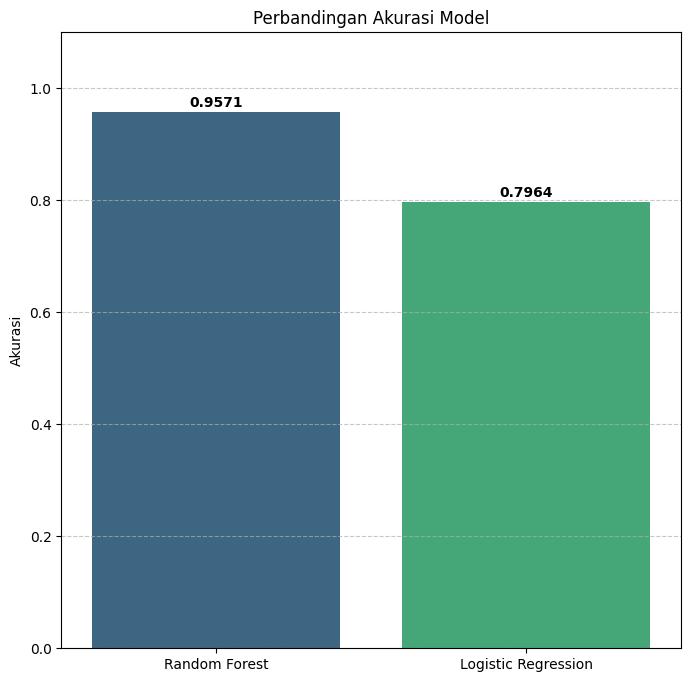

In [ ]:
acc_rf = accuracy_score(y_test, y_pred_rf)
acc_lr = accuracy_score(y_test, y_pred_lr)

model_names = ['Random Forest', 'Logistic Regression']
accuracies = [acc_rf, acc_lr]

plt.figure(figsize=(8,8))
sns.barplot(x=model_names, y=accuracies, palette='viridis')

for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center', fontweight='bold')

plt.title('Perbandingan Akurasi Model')
plt.ylabel('Akurasi')
plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Dari grafik barplot yang ditampilkan, terlihat bahwa model menggunakan algoritma Random Forest lebih tinggi akurasinya yakni 0.9571 dibandingkan dengan model yakni Naive Bayes = 0.7964 untuk memprediksi harga saham setiap tahun.